`-` 별그림 `stars(x) : x = data.frame`

값들을 0.2에서 1 사이 공통범위로 표시하기 위하여 변환을 한다.

* 팀 타율 <- 0.2 + 0.8 × (팀 타율 - 최소값) / (최대값 - 최소값)
* 팀 방어율 <- 0.2 + 0.8 × (최대값 - 팀 방어율) / (최대값 - 최소값) : 역으로 변환
* 출루율 <- 0.2 + 0.8 × (출루율 - 최소값) / (최대값 - 최소값)

`-` 산점도 행렬 `pairs(x) : x = data.frame`

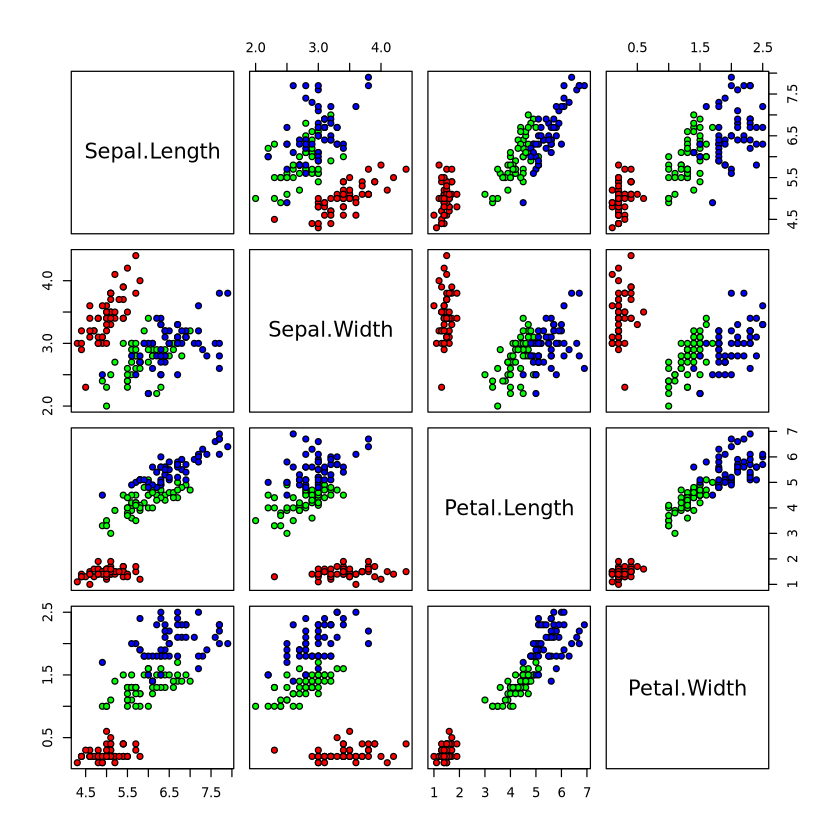

In [6]:
data(iris)
pairs(iris[1:4], pch = 21, bg = c("red", "green", "blue")[unclass(iris$Species)])

`-` 조건부 플롯 `xyplot(y~x|z)`

두 변수의 관계를 또 다른 변수에 조건화하여 그린 그림.

In [17]:
library(lattice)
data(quakes)
attach(quakes)

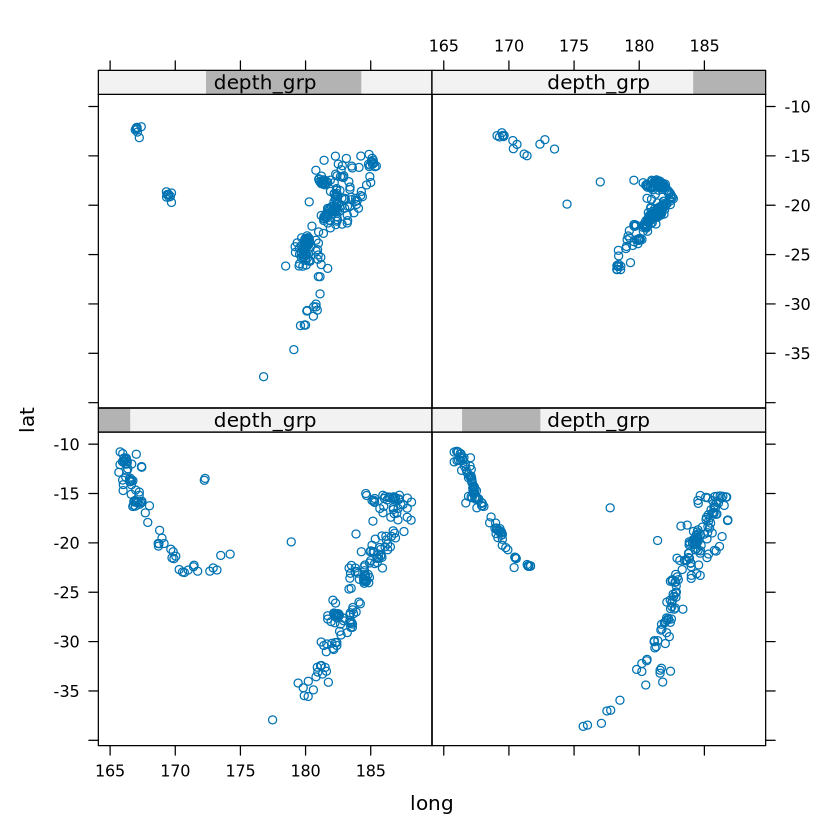

In [19]:
depth_grp = lattice::equal.count(depth, number = 4, overlap = 0)  ## z가 연속형일 때(진원의 깊이)
lattice::xyplot(lat~long | depth_grp)

`-` 평행자료 플롯 `parallelplot()`

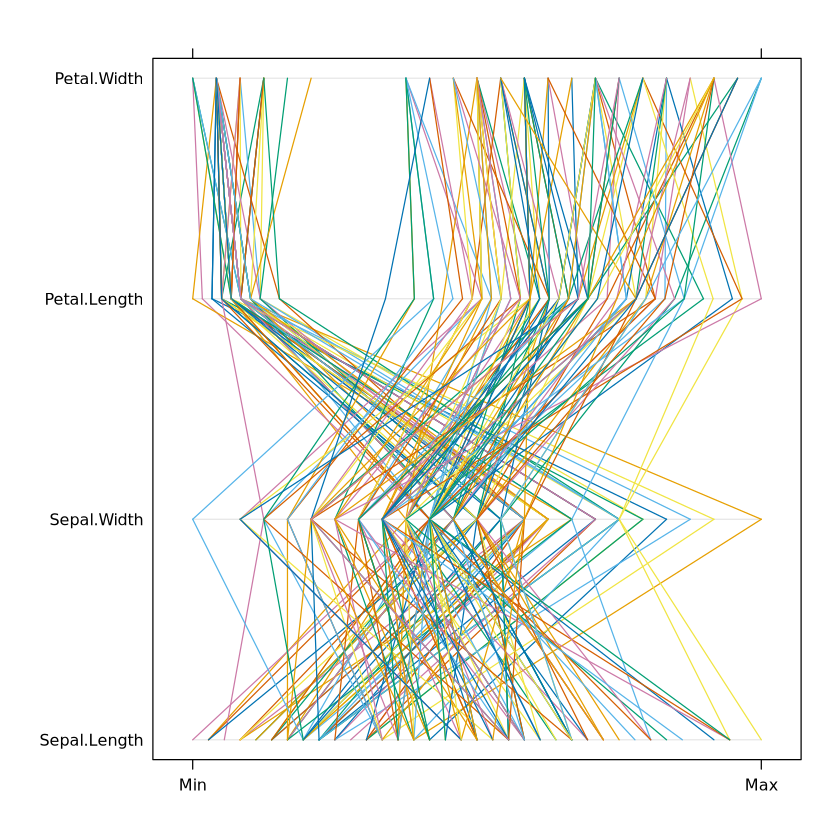

In [25]:
parallelplot(iris[, 1:4])

Petal Length : Petal Width는 양의 상관(줄줄히 내려옴)

Petal Length : Sepal Width는 음의 상관(교차함)

Sepal Width : Sepal Length는 음의 상관(교차함)

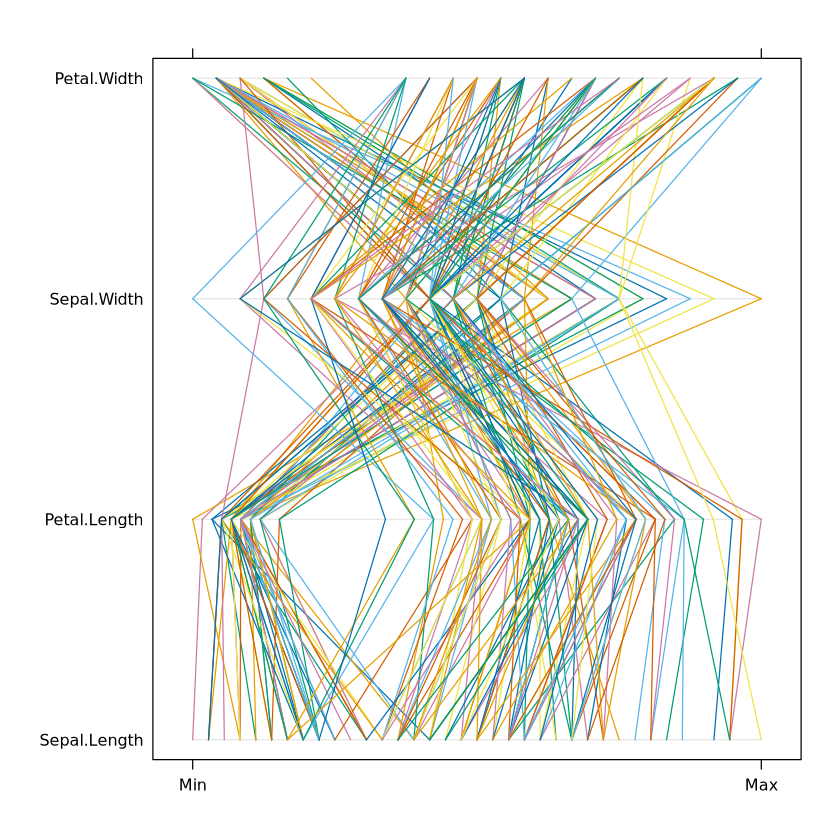

In [27]:
parallelplot(iris[, c(1,3,2,4)])

In [31]:
cor(iris$Sepal.Length, iris$Petal.Length)

[1] 0.8717538

`-` 조건부 평행좌표 플롯

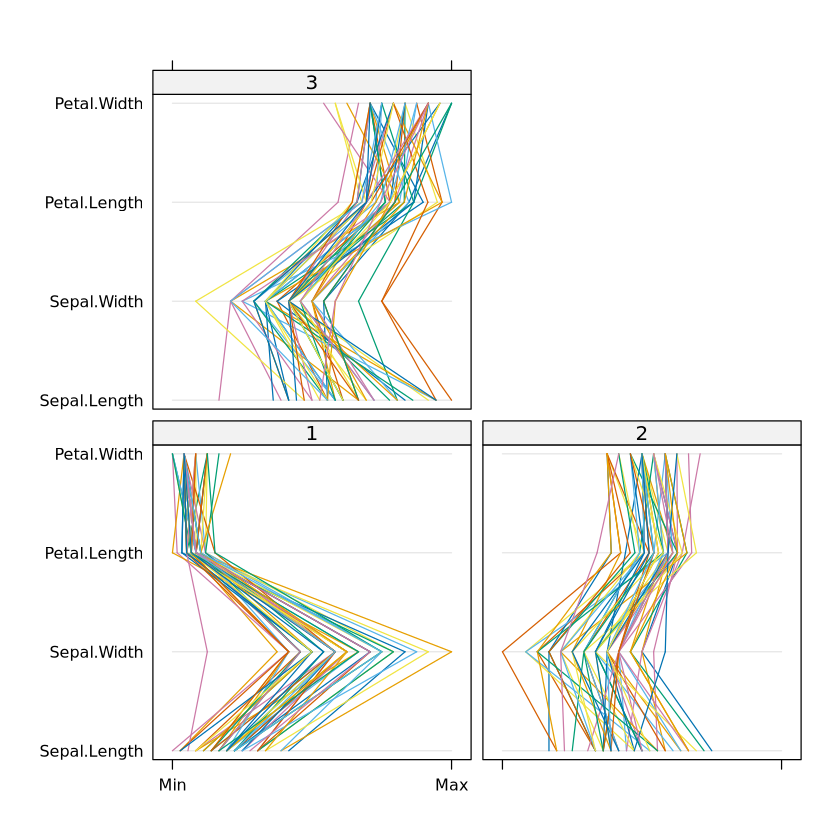

In [33]:
parallelplot(~iris[, 1:4] | iris$Species)

`-` 차원축소에 의한 시각화 : 주성분분석(PCA) `princomp(x, cor = T)`

`-` 비모수적 다중 회귀 : LOESS `loess(y~x)`

LOWESS 방법(비모수적 회귀함수)을 변수가 4개인 경우까지 일반화한 것.

> 다른 설명변수는 중위수로 두고, 각각의 설명변수의 효과를 파악

In [34]:
data(stackloss)
attach(stackloss)

The following object is masked _by_ .GlobalEnv:

    stack.loss


The following object is masked from package:datasets:

    stack.loss




In [42]:
summary(stackloss)

    Air.Flow       Water.Temp     Acid.Conc.      stack.loss   
 Min.   :50.00   Min.   :17.0   Min.   :72.00   Min.   : 7.00  
 1st Qu.:56.00   1st Qu.:18.0   1st Qu.:82.00   1st Qu.:11.00  
 Median :58.00   Median :20.0   Median :87.00   Median :15.00  
 Mean   :60.43   Mean   :21.1   Mean   :86.29   Mean   :17.52  
 3rd Qu.:62.00   3rd Qu.:24.0   3rd Qu.:89.00   3rd Qu.:19.00  
 Max.   :80.00   Max.   :27.0   Max.   :93.00   Max.   :42.00  

In [37]:
model_loess = loess(stack.loss~Air.Flow+Water.Temp+Acid.Conc.)

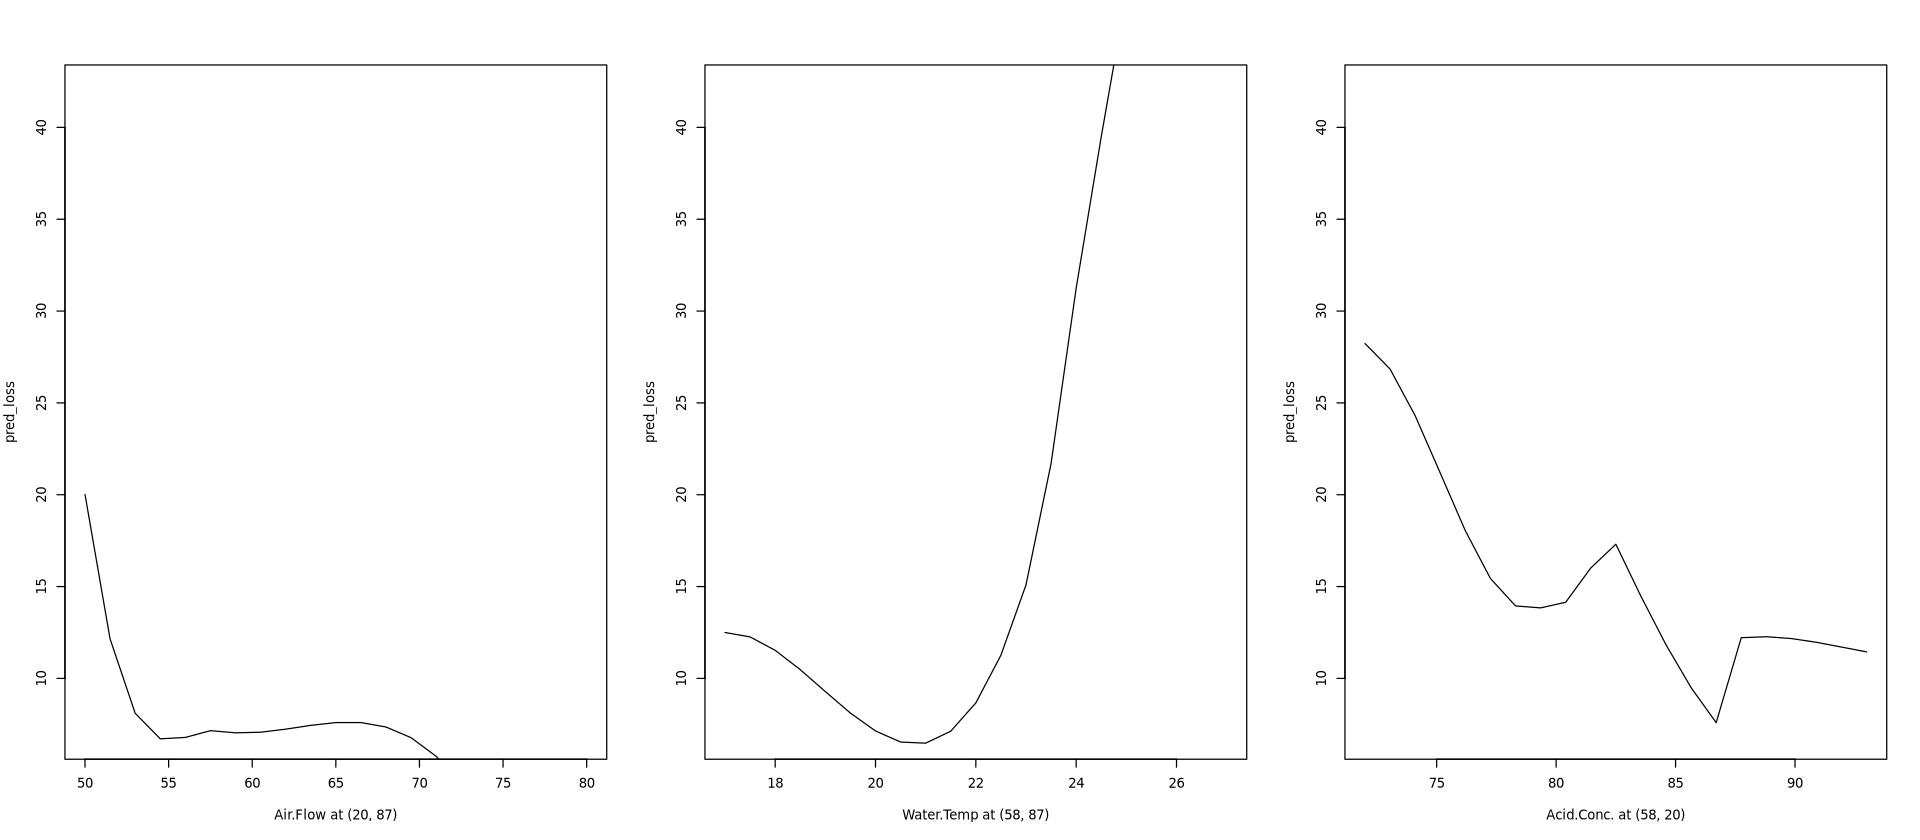

In [64]:
options(repr.plot.width = 16, repr.plot.height = 7)
par(mfrow = c(1, 3))

new_data = cbind(Air.Flow=seq(50, 80, length = 21), Water.Temp=rep(20, 21), Acid.Conc.=rep(87, 21))
pred_loss = predict(model_loess, newdata = new_data)
plot(pred_loss~seq(50, 80, length = 21), xlab = "Air.Flow at (20, 87)", type = "l", ylim = c(7, 42))

new_data = cbind(Air.Flow=rep(58, 21), Water.Temp=seq(17, 27, length = 21), Acid.Conc.=rep(87, 21))
pred_loss = predict(model_loess, newdata = new_data)
plot(pred_loss~seq(17, 27, length = 21), xlab = "Water.Temp at (58, 87)", type = "l", ylim = c(7, 42))

new_data = cbind(Air.Flow=rep(58, 21), Water.Temp=rep(20, 21), Acid.Conc.=seq(72, 93, length = 21))
pred_loss = predict(model_loess, newdata = new_data)
plot(pred_loss~seq(72, 93, length = 21), xlab = "Acid.Conc. at (58, 20)", type = "l", ylim = c(7, 42))

> 최적점을 찾는 거.

Q1, Q2, Q3에서의 최소값 탐색

In [65]:
summary(stackloss)

    Air.Flow       Water.Temp     Acid.Conc.      stack.loss   
 Min.   :50.00   Min.   :17.0   Min.   :72.00   Min.   : 7.00  
 1st Qu.:56.00   1st Qu.:18.0   1st Qu.:82.00   1st Qu.:11.00  
 Median :58.00   Median :20.0   Median :87.00   Median :15.00  
 Mean   :60.43   Mean   :21.1   Mean   :86.29   Mean   :17.52  
 3rd Qu.:62.00   3rd Qu.:24.0   3rd Qu.:89.00   3rd Qu.:19.00  
 Max.   :80.00   Max.   :27.0   Max.   :93.00   Max.   :42.00  

In [69]:
new_data = cbind(Air.Flow = c(rep(56, 9), rep(58, 9), rep(62, 9)),
                 Water.Temp = rep(c(rep(18, 3), rep(20, 3), rep(24, 3)), 3),
                 Acid.Conc. = rep(c(82, 87, 89), 9))
pred_loss = predict(model_loess, newdata = new_data)
which(pred_loss == min(pred_loss))

[1] 19

> 19번째 경우가 최소가 됨.